In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [338]:
df=pd.read_csv("Train.csv")

In [340]:
df.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [342]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                           Name   Location  \
0              0            Tata Tiago 1.2 Revotron XZ WO Alloy  Hyderabad   
1              1     Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT      Kochi   
2              2         Skoda Rapid 2013-2016 1.6 MPI Ambition     Mumbai   
3              3                        Tata Indica V2 DLS BSII     Jaipur   
4              4           Tata Manza Club Class Quadrajet90 LX     Mumbai   
...          ...                                            ...        ...   
3745        3745                                    BMW X5 3.0d    Chennai   
3746        3746  Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV      Delhi   
3747        3747                        Maruti Wagon R LXI BSII  Ahmedabad   
3748        3748                 Renault Duster 85PS Diesel RxL  Hyderabad   
3749        3749                       Maruti Wagon R VXI BS IV    Kolkata   

      Year  Kilometers_Driven

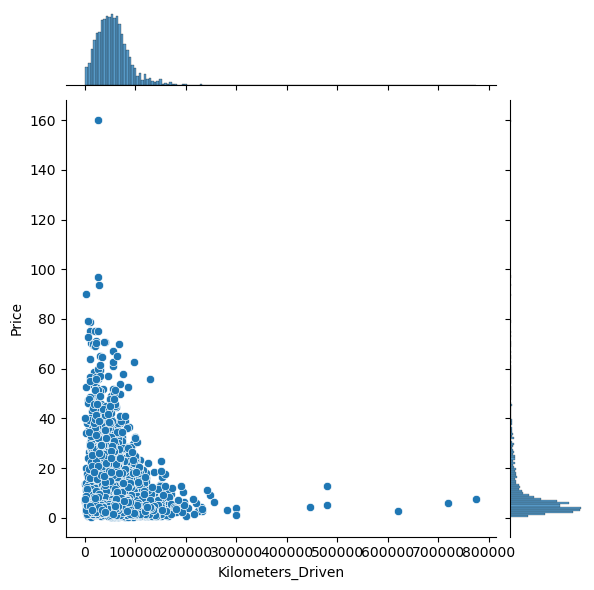

In [344]:
# EDA
sns.jointplot(x="Kilometers_Driven",y="Price",data=df)

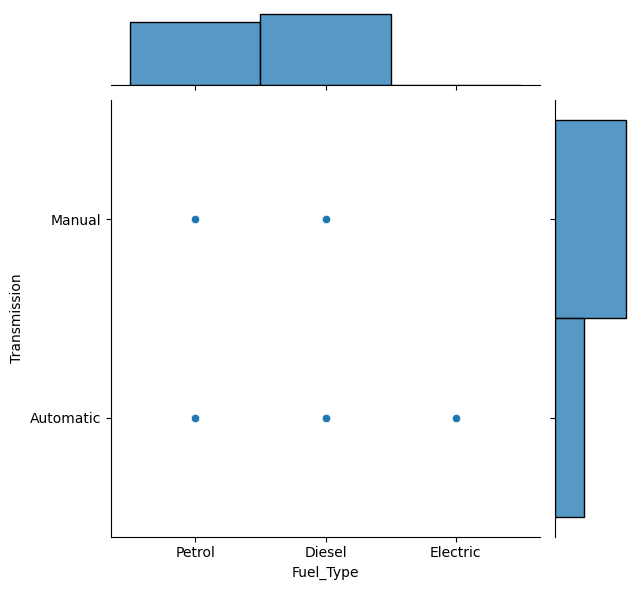

In [345]:
# EDA
sns.jointplot(x="Fuel_Type",y="Transmission",data=df)

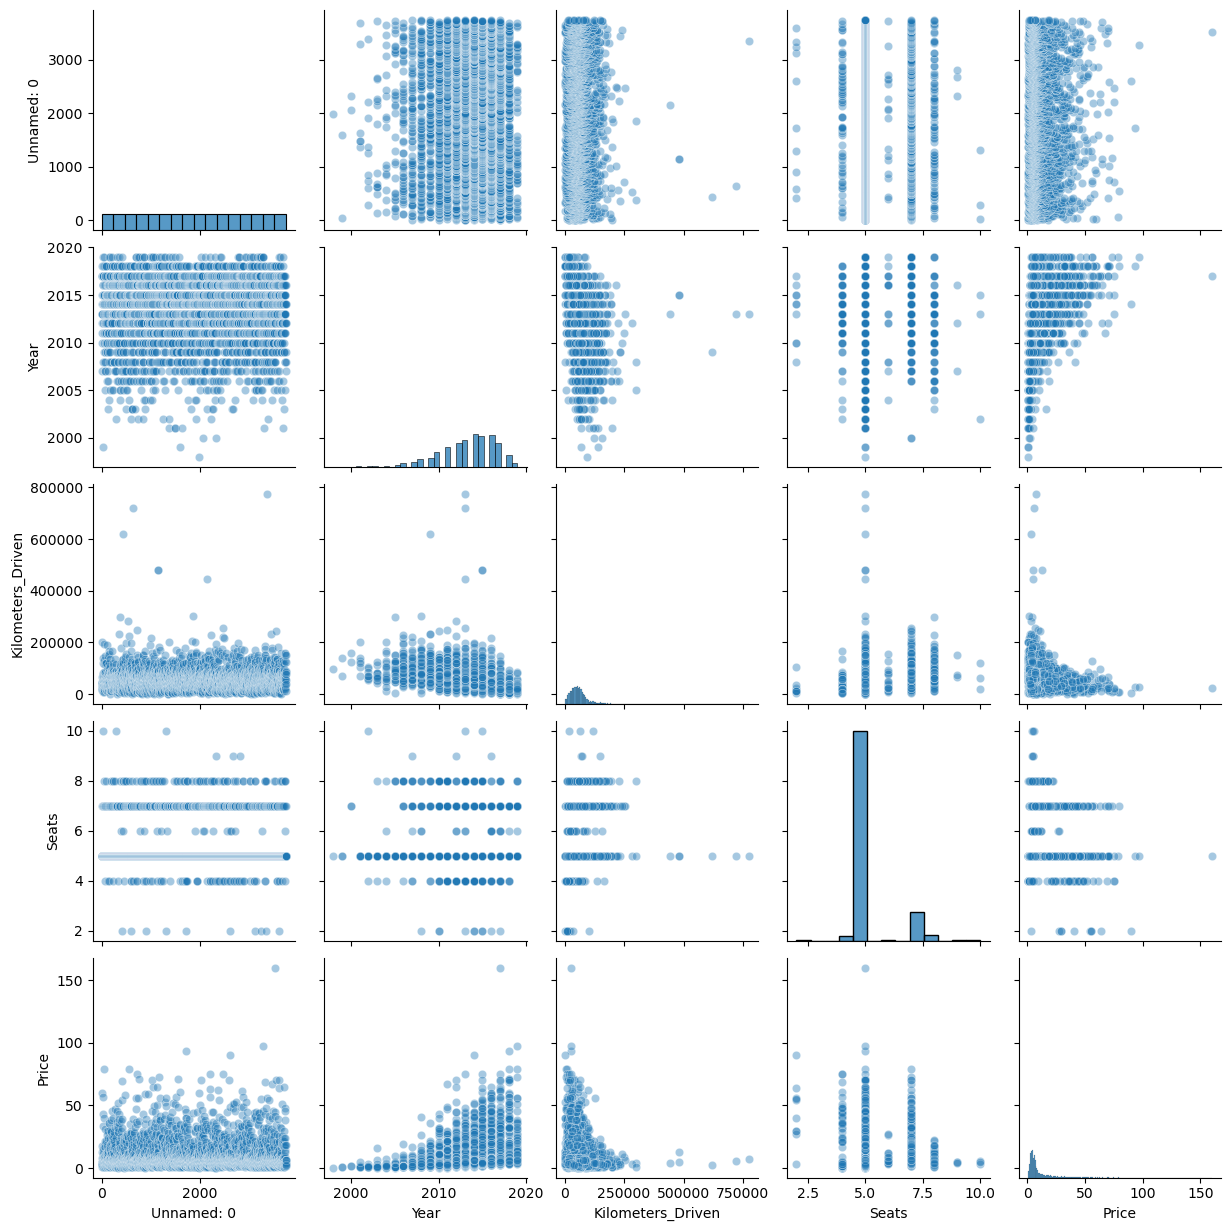

In [347]:
import seaborn as sns
sns.pairplot(df, kind='scatter' ,plot_kws={'alpha': 0.4})

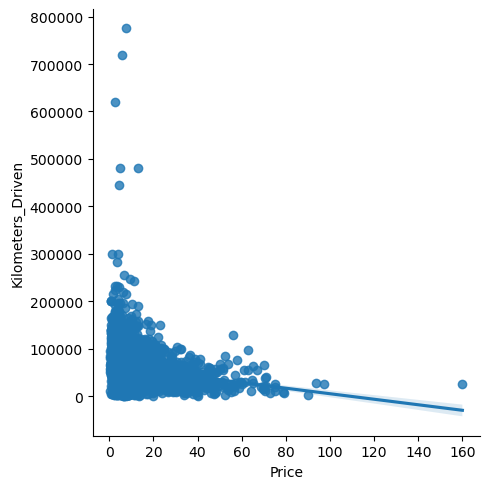

In [349]:
sns.lmplot(x = 'Price' ,y='Kilometers_Driven' ,data = df)

In [415]:
train_data = pd.read_csv('Train.csv')
num_words=4
train_data = train_data.drop(['Unnamed: 0'], axis=1)
train_data.Name = train_data.Name.str.split().str.slice(0,num_words).str.join(" ") #including only starting words of the column name which describe company and model
train_data = pd.get_dummies(train_data, columns=["Name",'Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
train_data = train_data.dropna()
train_data.Mileage = train_data.Mileage.str.replace(' kmpl','').astype("float64")
train_data.Engine = train_data.Engine.str.replace(' CC','').astype("float64")
train_data = train_data[train_data.Power != 'null bhp']
train_data.Power = train_data.Power.str.replace(' bhp','').astype("float64")
train_data.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2017,16500,23.84,1199.0,84.00,5.0,5.00,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,4.50,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,2007,200000,17.20,1396.0,53.50,5.0,0.85,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2013,64000,21.02,1248.0,88.76,5.0,2.65,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [417]:
test_data = pd.read_csv('Test.csv')
test_data = test_data.drop(['Unnamed: 0'], axis=1)
test_data.Name = test_data.Name.str.split().str.slice(0,num_words).str.join(" ")
test_data = pd.get_dummies(test_data, columns=['Name','Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
test_data = test_data.dropna()
test_data.Mileage = test_data.Mileage.str.replace(' kmpl','').astype("float64")
test_data.Engine = test_data.Engine.str.replace(' CC','').astype("float64")
test_data = test_data[test_data.Power != 'null bhp']
test_data.Power = test_data.Power.str.replace(' bhp','').astype("float64")
test_data = test_data.reindex(columns=train_data.columns,fill_value=False)
test_data.head()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2013,84175,23.40,1248.0,74.00,5.0,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2012,62282,16.95,1197.0,78.90,5.0,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2017,37460,18.60,1197.0,81.86,5.0,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,2011,106976,13.50,2400.0,215.00,5.0,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2013,60000,20.36,1197.0,78.90,5.0,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [419]:
train_num_col = train_data.select_dtypes(include=['int64','float64']).columns # Finding numerical data
train_num_col = train_num_col.drop('Price')
train_data[train_num_col] = (train_data[train_num_col] - train_data[train_num_col].mean()) / train_data[train_num_col].std()
test_data.head()
test_num_col = test_data.select_dtypes(include=['int64','float64']).columns
test_num_col = test_num_col.drop('Price')
test_data[test_num_col] = (test_data[test_num_col] - test_data[test_num_col].mean()) / test_data[test_num_col].std()
test_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi A3 35 TDI,Name_Audi A4 1.8 TFSI,Name_Audi A4 2.0 TDI,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,-0.166278,0.118047,1.236734,-0.679771,-0.801440,-0.381061,6.95,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.483790,0.001074,-0.287738,-0.767349,-0.704491,-0.381061,2.90,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1.103767,-0.131549,0.102244,-0.767349,-0.645925,-0.381061,6.28,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3,-0.801301,0.239872,-1.103152,1.298475,1.988335,-0.381061,13.80,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,-0.166278,-0.011118,0.518223,-0.767349,-0.704491,-0.381061,2.75,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [421]:
X_train = train_data.drop('Price', axis=1).values.astype('float64') # Ensuring feature array is of float64 type
y_train = train_data['Price'].values.astype('float64') # Ensuring target array is of float64 type

X_test = test_data.drop('Price', axis=1).values.astype('float64')
y_test = test_data['Price'].values.astype('float64')

In [423]:
def calculate_r2(y_true, y_pred):
    r2 = 1 - (np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true))))
    return  r2

In [425]:
def update_accuracy(i,train_acc,y_true_train,y_pred_train,test_acc,weights,bias):
    global y_test,X_test
    
    y_pred_test=np.dot(X_test,weights)+bias
    train_acc[i]= calculate_r2(y_true_train,y_pred_train)
    test_acc[i]= calculate_r2(y_test,y_pred_test)
    
    return train_acc,test_acc

In [427]:
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    train_acc= np.zeros(iterations)
    test_acc= np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights) + bias 
        errors = predictions - y
        weight_gradient = (1 / m) * X.T.dot(errors)
        bias_gradient = (1 / m) * np.sum(errors)

        train_acc,test_acc=update_accuracy(i,train_acc,y,predictions,test_acc,weights,bias) #storing the accuracies
        
        weights -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient

        pred = X.dot(weights) + bias 
        cost=(1 / (2 * m)) * np.sum((pred - y) ** 2)
        cost_history[i] = cost
        
        if i % 100 == 0:
            r2 = calculate_r2(y, predictions)
            print(f"Iteration {i}: Training R²: {r2:.4f}, Cost: {cost}, Testing accuracy: {test_acc[i]:.4f}")
    
    return weights, bias, cost_history, train_acc, test_acc

In [433]:
def predict(X, weights, bias):
    pred = X.dot(weights) + bias 
    pred = np.maximum(pred, 0)  
    return pred

In [443]:
learning_rate = 0.1
iterations = 100000
weights = np.zeros(X_train.shape[1])  # Initialize weights
bias = 0.0 
st_time=time.time()
weights, bias, cost_history, train_acc, test_acc = gradient_descent(X_train, y_train,weights,bias, learning_rate, iterations)
en_time=time.time()
print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)

Iteration 0: Training R²: -0.7306, Cost: 84.12789859017131, Testing accuracy: -0.7771
Iteration 100: Training R²: 0.6955, Cost: 19.3364293334839, Testing accuracy: 0.6745
Iteration 200: Training R²: 0.7131, Cost: 18.22674952119618, Testing accuracy: 0.6899
Iteration 300: Training R²: 0.7219, Cost: 17.670520799128994, Testing accuracy: 0.6980
Iteration 400: Training R²: 0.7283, Cost: 17.264416511350543, Testing accuracy: 0.7042
Iteration 500: Training R²: 0.7338, Cost: 16.914711381941192, Testing accuracy: 0.7095
Iteration 600: Training R²: 0.7388, Cost: 16.595880530780452, Testing accuracy: 0.7142
Iteration 700: Training R²: 0.7435, Cost: 16.299433443941197, Testing accuracy: 0.7186
Iteration 800: Training R²: 0.7479, Cost: 16.021558630852443, Testing accuracy: 0.7227
Iteration 900: Training R²: 0.7520, Cost: 15.759916165836252, Testing accuracy: 0.7265
Iteration 1000: Training R²: 0.7559, Cost: 15.512752822311821, Testing accuracy: 0.7300
Iteration 1100: Training R²: 0.7596, Cost: 15.

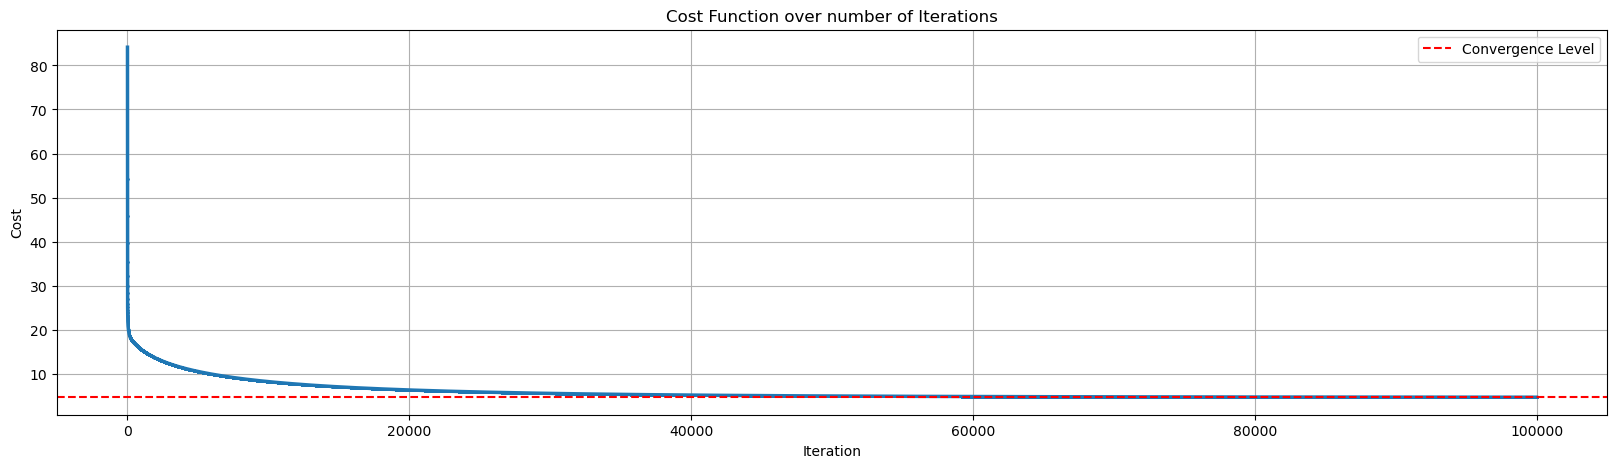

In [456]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(cost_history)), cost_history, linewidth=2.5, marker='o', markersize=1)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.grid(True)
plt.axhline(y=np.min(cost_history), color='red', linestyle='--', label='Convergence Level')
plt.title('Cost Function over number of Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

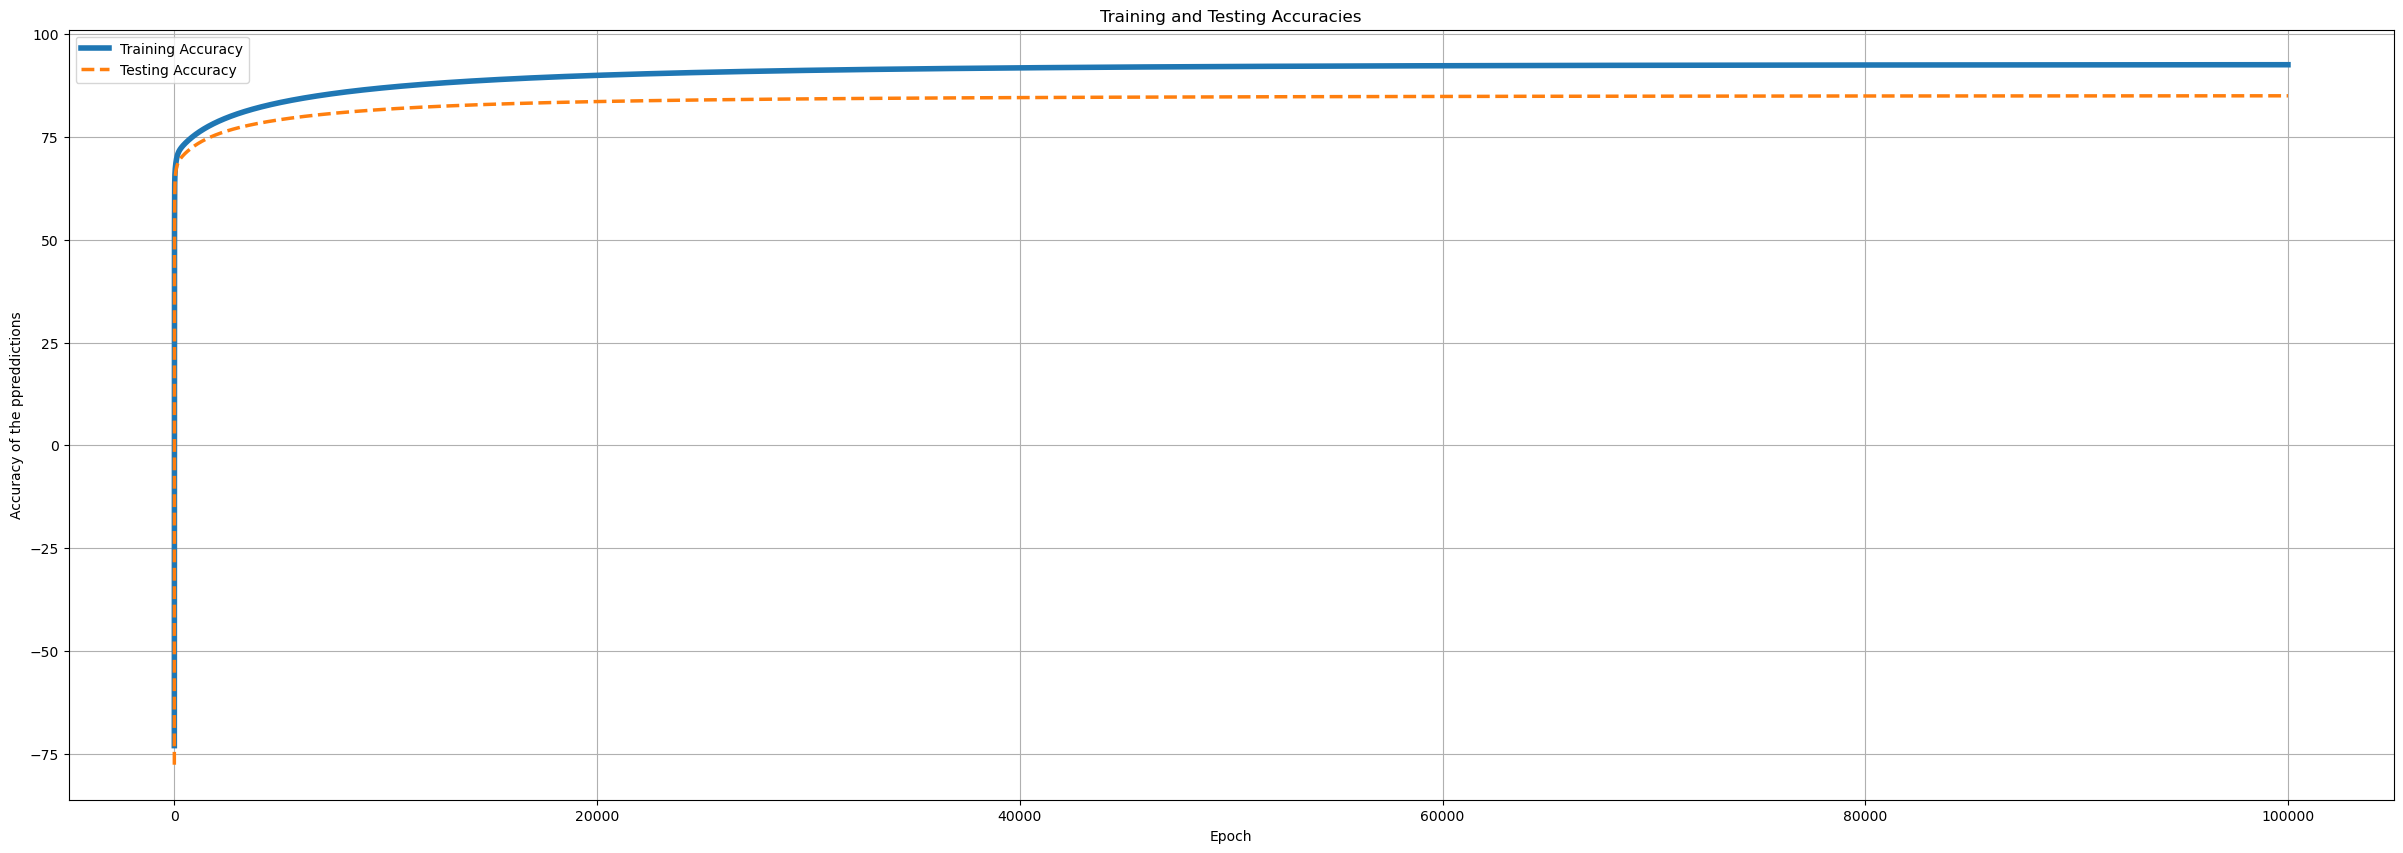

In [452]:
epochs=np.arange(iterations)
plt.figure(figsize=(30, 10))
plt.plot(epochs, train_acc*100, label='Training Accuracy',linewidth=4)
plt.plot(epochs, test_acc*100, label='Testing Accuracy', linestyle='--',linewidth=2.5)

plt.xlabel('Epoch')
plt.ylabel('Accuracy of the ppreddictions')
plt.title('Training and Testing Accuracies')
plt.legend()
plt.grid(True)
plt.show()


In [458]:
pred = predict(X_test, weights, bias)

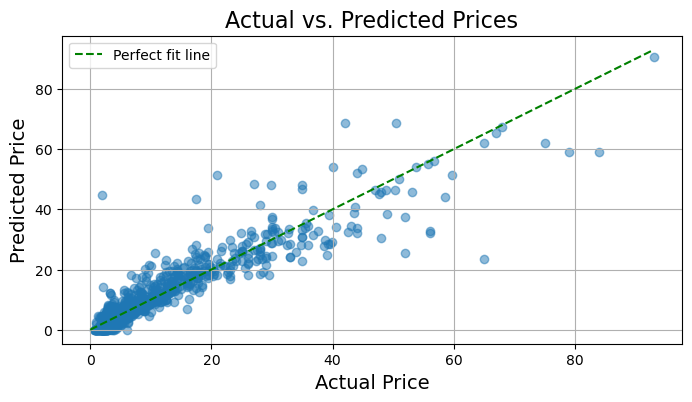

Final training Score: 92.5753%
Final testing Score: 85.0146%


In [466]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, pred,alpha=0.5)
min_price = y_test.min()
max_price = y_test.max()
plt.plot([0, max_price], [0, max_price], color='green', linestyle='--', label='Perfect fit line')

plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

train_pred = X_train.dot(weights) + bias
test_pred = X_test.dot(weights) + bias

r2_train=calculate_r2(y_train,train_pred)
r2_test=calculate_r2(y_test,test_pred)

print(f"Final training Score: {r2_train * 100:.4f}%")
print(f"Final testing Score: {r2_test * 100:.4f}%")

In [350]:
from sklearn.model_selection import train_test_split

In [351]:
x=df[['Year' ,'Kilometers_Driven' ,'Fuel_Type' ,'Transmission' ,'Owner_Type' ,'Mileage' ,'Engine','Power','Seats']]
y=df['Price']

In [352]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [353]:
x_train

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3603,2016,5240,Petrol,Automatic,First,21.9 kmpl,624 CC,37.48 bhp,4.0
1237,2016,28000,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0
2080,2011,99606,Diesel,Automatic,Second,16.07 kmpl,1995 CC,181 bhp,5.0
2566,2017,100000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0
887,2014,72563,Diesel,Manual,Second,22.77 kmpl,1498 CC,98.59 bhp,5.0
...,...,...,...,...,...,...,...,...,...
1130,2013,31000,Petrol,Manual,First,13.24 kmpl,1598 CC,102.5 bhp,5.0
1294,2009,60000,Petrol,Manual,Second,19.81 kmpl,1086 CC,68.05 bhp,5.0
860,2016,30000,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,5.0
3507,2014,56510,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.0


In [354]:
y_test

2148     4.45
1044     2.85
3318    23.50
439      5.00
3515     3.21
        ...  
1459    14.05
1789     5.29
3662     1.40
1151     5.88
942      6.95
Name: Price, Length: 1125, dtype: float64

In [355]:
#train the model

In [356]:
from sklearn.linear_model import LinearRegression

In [357]:
lm=LinearRegression()

In [359]:
print(x_train.head())
print(x_train.dtypes)

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
3603  2016               5240    Petrol    Automatic      First   21.9 kmpl   
1237  2016              28000    Petrol       Manual      First   17.8 kmpl   
2080  2011              99606    Diesel    Automatic     Second  16.07 kmpl   
2566  2017             100000    Petrol       Manual      First  17.57 kmpl   
887   2014              72563    Diesel       Manual     Second  22.77 kmpl   

       Engine      Power  Seats  
3603   624 CC  37.48 bhp    4.0  
1237  1497 CC  117.3 bhp    5.0  
2080  1995 CC    181 bhp    5.0  
2566  1193 CC   88.7 bhp    5.0  
887   1498 CC  98.59 bhp    5.0  
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object


In [361]:
x_train=pd.get_dummies(x_train,columns=['Fuel_Type'],drop_first=True)

In [373]:
x_train = pd.get_dummies(x_train, columns=['Owner_Type', 'Fuel_Type_Electric','Mileage','Engine','Power'], drop_first=True)

In [375]:
   from sklearn.preprocessing import LabelEncoder

   le = LabelEncoder()
   x_train['Transmission'] = le.fit_transform(x_train['Transmission'])
   

In [377]:
   x_train = pd.get_dummies(x_train, columns=['Transmission'], drop_first=True)
   

In [379]:
   x_train.fillna(value=0, inplace=True)  # Replace NaN with 0 or use another strategy
   

In [381]:
   lm.fit(x_train, y_train)
   

LinearRegression()

In [382]:
lm.fit(x_train, y_train)

LinearRegression()

In [383]:
   lm.fit(x_train, y_train)
   

LinearRegression()

In [385]:
lm.coef_

array([ 9.11522079e-01, -6.92974520e-06, -2.33035502e-01, -6.64141736e+00,
        1.16873314e+00, -2.41490575e-01, -4.46260966e-01, -1.60210634e+00,
        4.27759990e-02,  2.37278384e+01, -7.73080997e+00,  7.69895482e+00,
        2.26879928e+00,  3.04458341e+00, -2.76270055e+01,  2.59594736e+01,
        5.18921761e+00,  3.73429808e+01, -6.07233161e+00,  9.96686899e+00,
        2.30470726e+01, -1.00793162e+01,  4.90053005e+00,  9.14167263e+00,
        1.23374174e+01, -8.98898674e-01,  3.64526606e+00,  1.20245584e+01,
       -7.03724452e+00,  7.75591256e+00, -1.15627859e+01, -1.40715691e+00,
       -2.57435643e+00,  1.65893564e+00, -2.16001868e+01,  2.60156442e+00,
       -1.12723132e+00,  1.09653012e+01,  1.99391179e+00,  3.58402613e+00,
        4.71791136e+00, -1.83501088e-01,  7.05427825e-01,  9.26393671e+00,
        3.51377282e+00,  1.17595923e+01, -2.08375808e-01, -2.09278961e+01,
        3.87401602e+00,  1.49838429e+01,  4.50661348e+01,  3.84401421e+00,
       -1.11203293e+00,  

In [386]:
   data.columns
   

Index(['Owner_type', 'Fuel_type'], dtype='object')

In [388]:
   import pandas as pd

   # Create a sample DataFrame
   data = pd.DataFrame({
       'Owner_type': ['Owner1', 'Owner2', 'Owner3'],
       'Fuel_type': ['Petrol', 'Diesel', 'Electric']
   })

   # Access the columns correctly
   print(data.columns)  # This will print the names of the columns in the DataFrame

   # Example of using the columns in a pivot operation
   reshaped_data = data.pivot(index='Owner_type', columns='Fuel_type', values='Fuel_type')
   print(reshaped_data)
   

Index(['Owner_type', 'Fuel_type'], dtype='object')
Fuel_type   Diesel  Electric  Petrol
Owner_type                          
Owner1         NaN       NaN  Petrol
Owner2      Diesel       NaN     NaN
Owner3         NaN  Electric     NaN


In [389]:
cdf = pd.DataFrame(lm.coef_, index=x_train.columns, columns=['Coef'])

In [395]:
#predictions

In [396]:
predictions=lm.predict(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Engine
- Fuel_Type
- Mileage
- Owner_Type
- Power
- ...
Feature names seen at fit time, yet now missing:
- Engine_1061 CC
- Engine_1086 CC
- Engine_1120 CC
- Engine_1150 CC
- Engine_1172 CC
- ...


In [399]:
predictions

NameError: name 'predictions' is not defined

In [401]:
   print(x_train.shape)  # Should show (n_samples, n_features)
   print(x_test.shape)   # Should also show (n_samples, n_features)
   

(2625, 778)
(1125, 9)


In [403]:
   print(x_test.dtypes)  # Check data types of columns
   print(x_test.isnull().sum())  # Check for NaN values
   

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                10
dtype: int64


In [405]:
   print(x_test.dtypes)  # Check data types of columns
   print(x_test.isnull().sum())  # Check for NaN values
   

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                10
dtype: int64


In [407]:
   from sklearn.preprocessing import OneHotEncoder

   encoder = OneHotEncoder()
   x_train_encoded = encoder.fit_transform(x_train)
   x_test_encoded = encoder.transform(x_test)
   

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Engine
- Fuel_Type
- Mileage
- Owner_Type
- Power
- ...
Feature names seen at fit time, yet now missing:
- Engine_1061 CC
- Engine_1086 CC
- Engine_1120 CC
- Engine_1150 CC
- Engine_1172 CC
- ...


In [409]:
predictios=lm.predict[x_test)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1869182007.py, line 1)

In [411]:
sns.scatterplot(predictions,y_test)
plt.xlabel("predictions")

NameError: name 'predictions' is not defined